In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data48 = pd.read_csv('data/48-gon.csv')
data4  = pd.read_csv('data/4-gon.csv')

data48 = data48[data48.time <= 99000]
data4 = data4[data4.time <= 99000]

In [2]:
def groupby_freq(df, freq=None, agg='mean'):
    freq = freq or 0.01
    freq = len(df.index) * freq
    interval = pd.interval_range(start=1, end=len(df.index), freq=freq)
    return df.groupby(pd.cut(df.index, bins=interval, right=True, include_lowest=True), as_index=False).agg(agg)

def agg_robot(data, robot_id, **kwargs):
    robot = data[data.id == robot_id].set_index('time')
    return groupby_freq(robot, **kwargs)

def agg_all(data, outer_agg='mean', **kwargs):
    df = data.groupby('time').agg(outer_agg)
    return groupby_freq(df, **kwargs)

In [7]:
data4[data4.id < 0]

Empty DataFrame
Columns: [id, time, bumped_ahead, bumped_behind, avg_behind, avg_ahead, still_hitting, time_since_bump, bump_force]
Index: []

In [70]:
all_robots = agg_all(data48)

In [72]:
all_robots['time_since_bump'].plot()
plt.show()

In [45]:
def compare(rid, df1, df2, col, agg='mean'):
    robot1 = df1[df1.id == rid].reset_index().drop('index', axis=1)
    robot2 = df2[df2.id == rid].reset_index().drop('index', axis=1)
    data1 = groupby_freq(robot1, agg=agg)[col]
    data2 = groupby_freq(robot2, agg=agg)[col]
    
    plt.figure(figsize=(20, 5))
    data1.plot(style='r-')
    data2.plot(style='b-')
    plt.show()

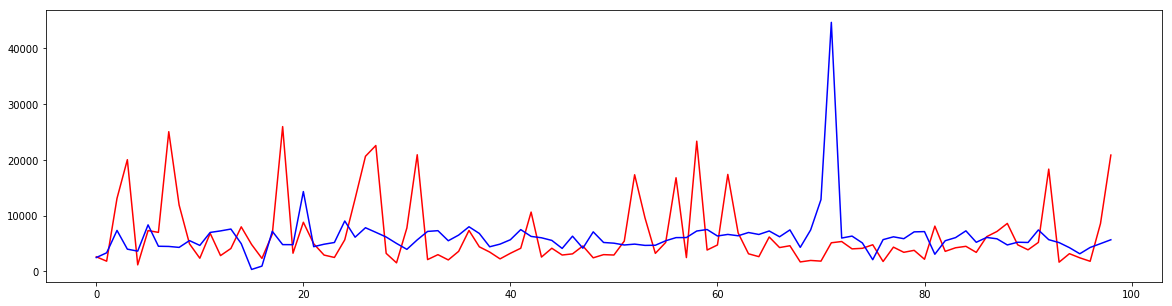

In [82]:
rid = 25
compare(rid, data4, data48, 'time_since_bump', agg='var')

In [78]:
variances = []
for i in range(max(data48['id']) + 1):
    avgs = groupby_freq(data48[data48.id == i].reset_index().drop('index', axis=1), agg='var')['time_since_bump']
    variances += [avgs]
    
variances

[0      2568.945904
 1      1936.366607
 2      4298.028174
 3      5045.315645
 4      6661.876496
 5      6018.791524
 6      4400.232003
 7      6554.346024
 8      5326.235116
 9      6663.030884
 10     7556.785403
 11     2860.648957
 12     6011.346354
 13     6534.365070
 14     7248.198298
 15     7126.705830
 16     6252.777650
 17     6983.964686
 18     7188.244737
 19     8807.394266
 20     5681.430274
 21     6740.450194
 22     7133.937294
 23     7971.529084
 24     7850.067000
 25     7969.081836
 26     5852.772542
 27     6539.746051
 28     5778.308848
 29     7349.657342
           ...     
 69     6640.510488
 70     6725.836391
 71     8256.604872
 72     3768.836335
 73     8632.938869
 74     7648.179833
 75     2476.724230
 76     6898.878631
 77     7934.258562
 78    10080.862359
 79     4513.415454
 80     4795.306758
 81     5814.543523
 82     5290.991966
 83     4810.202159
 84     7413.447421
 85     4252.242163
 86     4582.050169
 87     5430.285975


In [85]:
rid = 10

robot_bumps4 = data4[data4.bump_force > 0].reset_index().drop('index', axis=1)
robot_bumps48 = data48[data48.bump_force > 0].reset_index().drop('index', axis=1)

compare(rid, robot_bumps4, robot_bumps48, 'bump_force', agg='var')